In [118]:
import pandas as pd

# List of file names
file_names = ['forest_land.csv', 'arable_land.csv', 'GDP.csv', 'CO2.csv','population.csv','energy_consumption.csv']  # Add your file names

# Read the data from each file
dfs = [pd.read_csv(file, encoding='latin-1') for file in file_names]

# Select specific countries
selected_countries = ['Armenia', 'Pakistan', 'United States', 'China']

# Save selected rows for each country into different output files
for i, df in enumerate(dfs):
    selected_rows = df[df['Country Name'].isin(selected_countries)]
    output_file = f'{file_names[i]}'  # Unique output file name
    selected_rows.to_csv(output_file, index=False)
    print(f"Selected Rows from File {i + 1} Saved to: {output_file}")


Selected Rows from File 1 Saved to: forest_land.csv
Selected Rows from File 2 Saved to: arable_land.csv
Selected Rows from File 3 Saved to: GDP.csv
Selected Rows from File 4 Saved to: CO2.csv
Selected Rows from File 5 Saved to: population.csv
Selected Rows from File 6 Saved to: energy_consumption.csv


In [119]:
a = dfs[0]['Country Name']
country_name = []
for name in a:
    country_name.append(name)

country_name

['Armenia', 'China', 'Pakistan', 'United States']

In [120]:
import pandas as pd
import numpy as np

def read_preprocess_and_transpose(filename):
    """
    Reads, preprocesses, and transposes a World Bank format CSV file.

    Parameters:
        filename (str): The name of the CSV file.

    Returns:
        pd.DataFrame: The DataFrame after preprocessing.
        pd.DataFrame: The transposed DataFrame.
    """
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(filename, encoding='latin-1', na_values=['..'])  # Adjust encoding if needed

        # Specify the columns to be removed
        columns_to_remove = ['Series Name', 'Series Code', 'Country Code','2013 [YR2013]',	'2014 [YR2014]','2016 [YR2016]',	'2017 [YR2017]','2018 [YR2018]',	'2019 [YR2019]', '2021 [YR2021]', '2022 [YR2022]']

        # Remove the specified columns
        df = df.drop(columns=columns_to_remove, errors='ignore')

        # Remove rows with NaN values
        df = df.dropna()

        # Transpose the DataFrame
        transposed_df = df.set_index('Country Name').transpose()

        # Fill NaN values with the mean of each column
        transposed_df = transposed_df.apply(pd.to_numeric, errors='coerce')
        transposed_df = transposed_df.apply(lambda col: col.fillna(col.mean()))

        return df, transposed_df

    except Exception as e:
        print(f"Error reading or processing CSV file: {e}")
        return None, None

# Example usage:
filename = 'CO2.csv'  # Replace with the actual file name
df, df_transposed = read_preprocess_and_transpose(filename)

if df is not None and df_transposed is not None:
    print("DataFrame after removing specified columns and filling NaN values with the mean:")
    print(df)
    print("\nTransposed DataFrame:")
    print(df_transposed)
else:
    print("Failed to read or process the CSV file.")


DataFrame after removing specified columns and filling NaN values with the mean:
    Country Name  1990 [YR1990]  2000 [YR2000]  2015 [YR2015]  2020 [YR2020]
0        Armenia   2.438903e+04   5.990513e+03   9.155783e+03   1.042204e+04
1          China   3.238859e+06   4.567274e+06   1.180470e+07   1.294287e+07
2       Pakistan   1.604952e+05   2.335853e+05   3.756367e+05   4.366089e+05
3  United States   5.855541e+06   6.810656e+06   6.112057e+06   5.505181e+06

Transposed DataFrame:
Country Name        Armenia         China     Pakistan  United States
1990 [YR1990]  24389.028250  3.238859e+06  160495.1617    5855541.470
2000 [YR2000]   5990.512959  4.567274e+06  233585.3354    6810655.857
2015 [YR2015]   9155.783080  1.180470e+07  375636.6688    6112057.281
2020 [YR2020]  10422.041170  1.294287e+07  436608.9225    5505180.890


In [127]:
df_CO2, df_transposed_CO2 = read_preprocess_and_transpose('CO2.csv')
df_energy_conusmption, df_transposed_energy_consumption = read_preprocess_and_transpose('energy_consumption.csv')
df_arable_laned, df_transposed_arable_land = read_preprocess_and_transpose('arable_land.csv')
df_forest_land, df_transposed_forest_land = read_preprocess_and_transpose('forest_land.csv')
df_GDP, df_transposed_GDP = read_preprocess_and_transpose('GDP.csv')
df_population, df_transposed_population = read_preprocess_and_transpose('population.csv')


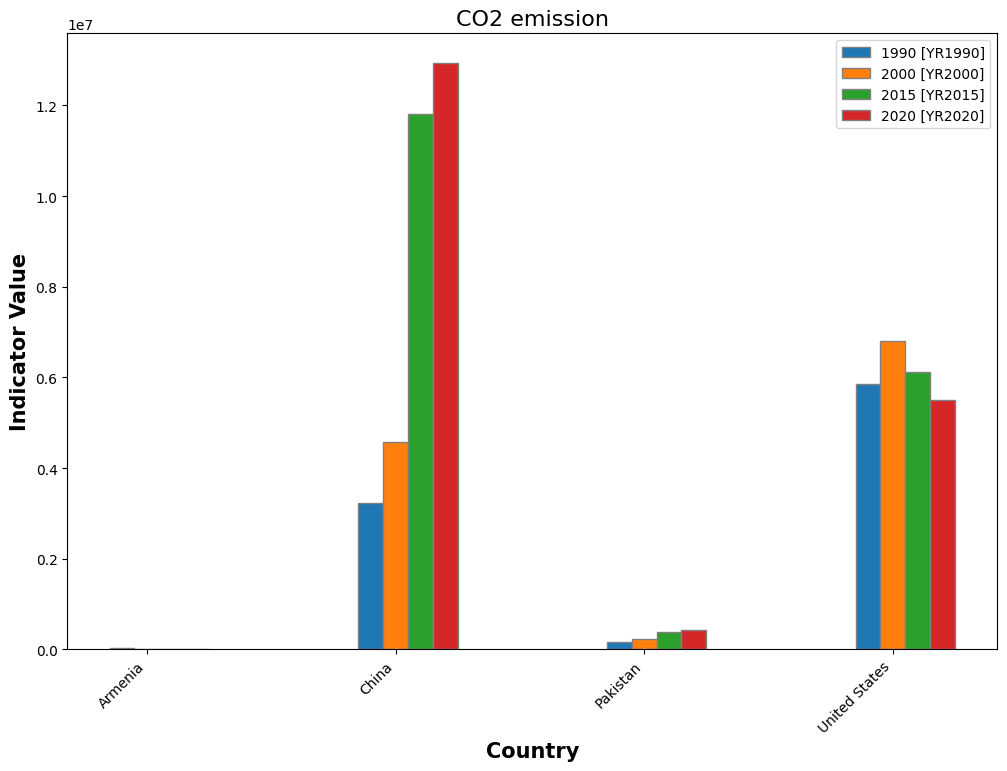

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_transposed is your transposed DataFrame
# If it's not, replace df_transposed with your actual DataFrame

# Extract the country names and years from the DataFrame
countries = df_transposed_CO2.columns.tolist()
years = df_transposed_CO2.index.tolist()

# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize=(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(countries))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
for idx, year in enumerate(years):
    plt.bar(br1 + idx * barWidth, df_transposed.loc[year], width=barWidth, edgecolor='grey', label=year)

# Adding Xticks
plt.xlabel('Country', fontweight='bold', fontsize=15)
plt.ylabel('Indicator Value', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(countries))], countries, rotation=45, ha='right')
plt.title('CO2 emission', fontsize=16)
plt.legend()
plt.show()


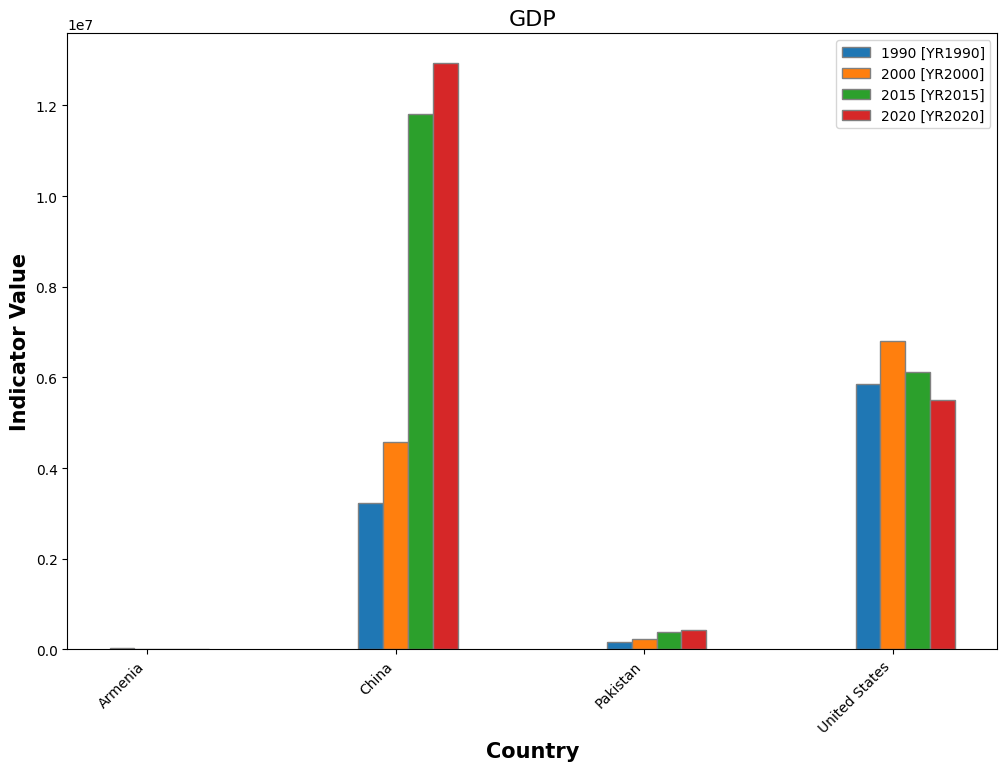

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_transposed is your transposed DataFrame
# If it's not, replace df_transposed with your actual DataFrame

# Extract the country names and years from the DataFrame
countries = df_transposed_GDP.columns.tolist()
years = df_transposed_GDP.index.tolist()

# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize=(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(countries))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
for idx, year in enumerate(years):
    plt.bar(br1 + idx * barWidth, df_transposed.loc[year], width=barWidth, edgecolor='grey', label=year)

# Adding Xticks
plt.xlabel('Country', fontweight='bold', fontsize=15)
plt.ylabel('Indicator Value', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(countries))], countries, rotation=45, ha='right')
plt.title('GDP', fontsize=16)
plt.legend()
plt.show()


In [268]:
df_CO2.describe()


,1990 [YR1990],2000 [YR2000],2015 [YR2015],2020 [YR2020]
count,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
mean,2.319821e+06,2.904377e+06,4.575387e+06,4.723770e+06
std,2.785537e+06,3.344549e+06,5.571135e+06,6.021062e+06
min,2.438903e+04,5.990513e+03,9.155783e+03,1.042204e+04
25%,1.264686e+05,1.766866e+05,2.840164e+05,3.300622e+05
50%,1.699677e+06,2.400430e+06,3.243847e+06,2.970895e+06
75%,3.893029e+06,5.128120e+06,7.535217e+06,7.364603e+06
max,5.855541e+06,6.810656e+06,1.180470e+07,1.294287e+07


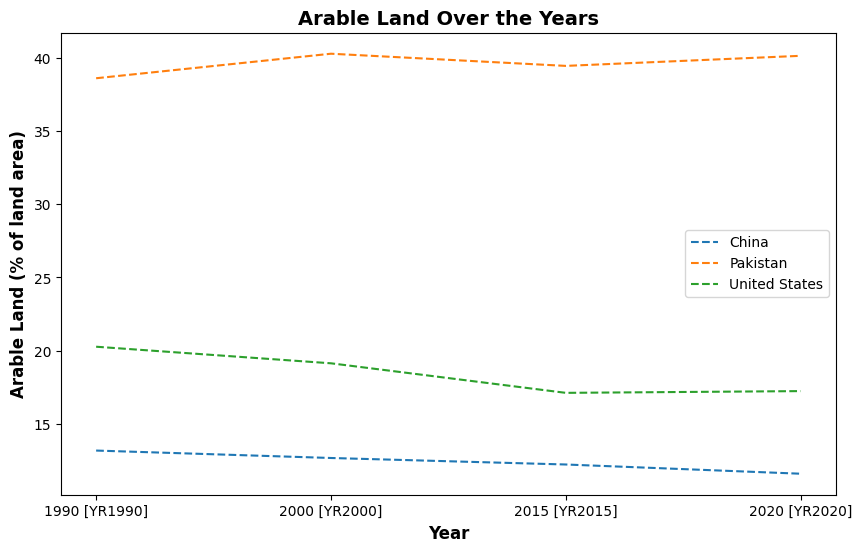

In [213]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data
data = df_transposed_arable_land

# Create a DataFrame
df = pd.DataFrame(data)
df.set_index('Country Name', inplace=True)

# Convert years to strings
df.columns = df.columns.astype(str)

# Plot the data as a dot plot
plt.figure(figsize=(10, 6))

for country in df.index:
    plt.plot(df.columns, df.loc[country],linestyle = "dashed", label=country)

# Adding labels and legend
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Arable Land (% of land area)', fontweight='bold', fontsize=12)
plt.title('Arable Land Over the Years', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, axis='y', linestyle='', alpha=0.7)

plt.show()


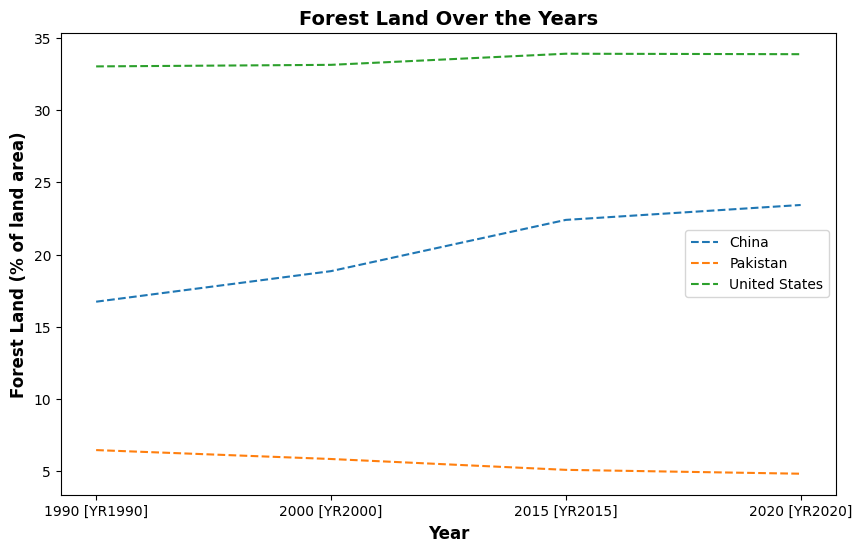

In [218]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a DataFrame
df = df_transposed_forest_land
df.set_index('Country Name', inplace=True)

# Convert years to strings
df.columns = df.columns.astype(str)

# Plot the data as a dot plot
plt.figure(figsize=(10, 6))

for country in df.index:
    plt.plot(df.columns, df.loc[country],linestyle = "dashed", label=country)

# Adding labels and legend
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Forest Land (% of land area)', fontweight='bold', fontsize=12)
plt.title('Forest Land Over the Years', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, axis='y', linestyle='', alpha=0.7)

plt.show()


In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List

def plot_country_correlation(country_name: str, file_names: List[str]) -> None:
    """
    Plots a correlation heatmap for a specified country using data from multiple files.

    Parameters:
    - country_name (str): The name of the country for which correlation is to be analyzed.
    - file_names (List[str]): A list of file names containing data for the analysis.

    Returns:
    - None
    """
    # Read the data from each file into a dictionary of DataFrames
    data = {}
    for file_name in file_names:
        data[file_name.split('.')[0]] = pd.read_csv(file_name, encoding='latin-1')

    # Extract data for the specified country from each file and set the file name as a column
    country_data = {key: df[df['Country Name'] == country_name]
                    .dropna(subset=['Country Name'])
                    .set_index('Country Name')
                    .transpose()
                    .rename(columns={0: key}) for key, df in data.items()}

    # Merge the DataFrames into a single DataFrame
    merged_country_data = pd.concat(country_data.values(), axis=1)

    # Keep only the years 1990, 2000, 2015, and 2020
    merged_country_data = merged_country_data.loc[['1990 [YR1990]', '2000 [YR2000]', '2015 [YR2015]', '2020 [YR2020]']]

    # Set column names as file names
    merged_country_data.columns = file_names

    # Display the modified country data
    print(merged_country_data)

    # Creating the correlation matrix of the country dataset
    country_corr_matrix = merged_country_data.corr()
    
    # Create the heatmap using the `heatmap` function of Seaborn
    sns.heatmap(country_corr_matrix, cmap='coolwarm', annot=True)
    plt.title(country_name)

    # Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
    plt.show()

              forest_land.csv arable_land.csv           GDP.csv      CO2.csv  \
1990 [YR1990]     16.73800655     13.18669614    360858000000.0  3238858.656   
2000 [YR2000]       18.853473        12.67972   1211330000000.0  4567274.433   
2015 [YR2015]       22.399821       12.235643  11061600000000.0  11804696.79   
2020 [YR2020]       23.431323       11.606259  14687700000000.0  12942868.34   

              population.csv energy_consumption.csv  
1990 [YR1990]       1.467303                  33.91  
2000 [YR2000]       0.787957                  29.63  
2015 [YR2015]       0.581456                  12.18  
2020 [YR2020]       0.238041                  14.81  


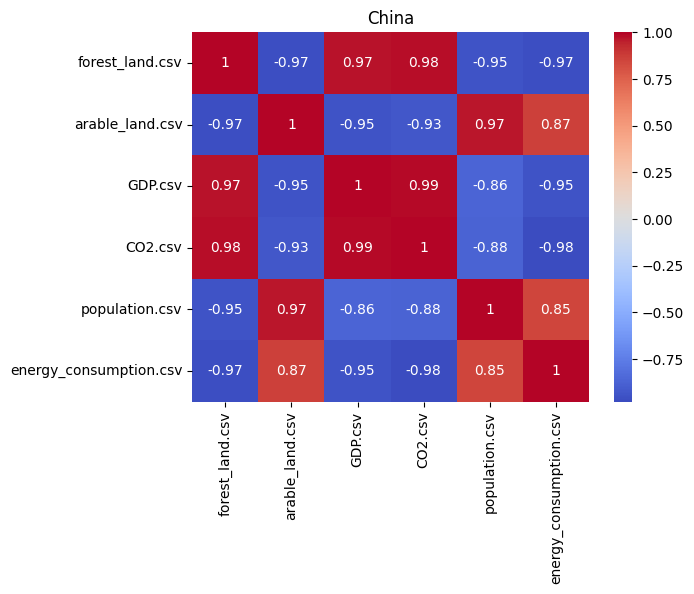

In [264]:
country_name = 'China'
file_names = ['forest_land.csv', 'arable_land.csv', 'GDP.csv', 'CO2.csv', 'population.csv', 'energy_consumption.csv']
plot_country_correlation(country_name, file_names)





              forest_land.csv arable_land.csv         GDP.csv      CO2.csv  \
1990 [YR1990]     6.468957555      38.5922582   40010423970.0  160495.1617   
2000 [YR2000]        5.852091        40.26567   82017743416.0  233585.3354   
2015 [YR2015]        5.101443        39.43545  270556000000.0  375636.6688   
2020 [YR2020]        4.833307       40.122976  300426000000.0  436608.9225   

              population.csv energy_consumption.csv  
1990 [YR1990]       3.297471                   57.5  
2000 [YR2000]       3.075553                  51.05  
2015 [YR2015]       1.296552                  45.88  
2020 [YR2020]       1.733028                   46.6  


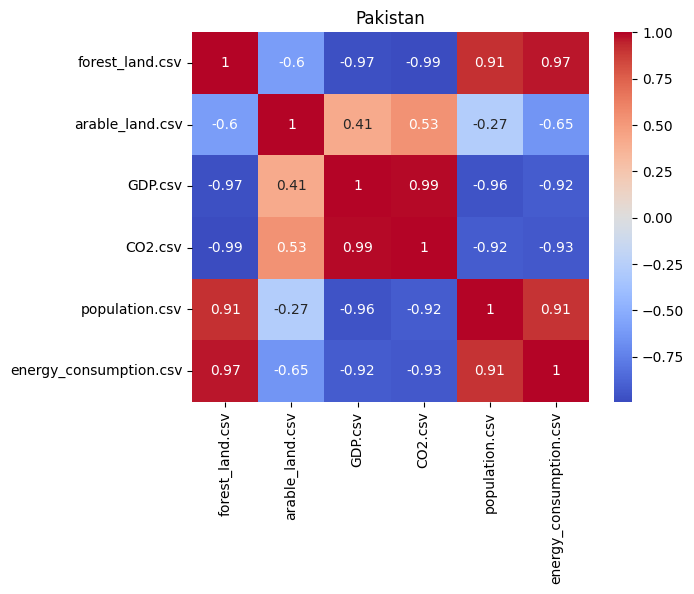

In [265]:
country_name = 'Pakistan'
file_names = ['forest_land.csv', 'arable_land.csv', 'GDP.csv', 'CO2.csv', 'population.csv', 'energy_consumption.csv']
plot_country_correlation(country_name, file_names)
